`TASK 2:`

Import all the necessary libraries

In [6]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from tabulate import tabulate

Load the training data into "trainingdata" (this stores all 800 datapoints)

In [7]:
with open('train_dataset.pickle', 'rb') as thisdata:
    trainingdata = pickle.load(thisdata)

    numberofTrainingData=len(trainingdata)
    # print(numberofTrainingData)

Plotting the training data which is Performance Score vs Risk Score

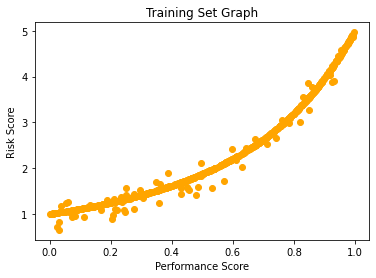

In [8]:
# Extract x and y values from trainingdata
x = [data[0] for data in trainingdata]
y = [data[1] for data in trainingdata]

# Create scatter plot
plt.scatter(x, y, color='orange')
plt.xlabel('Performance Score')
plt.ylabel('Risk Score')
plt.title('Training Set Graph')
plt.show()

Load the testing data into "testingdata" (this stores all 200 datapoints)

In [9]:
with open('test_dataset.pickle', 'rb') as thisdata:
    testingdata = pickle.load(thisdata)

    numberofTestingData=len(testingdata)
    # print(numberofTestingData)

Plotting the testing data which is Performance Score vs Risk Score

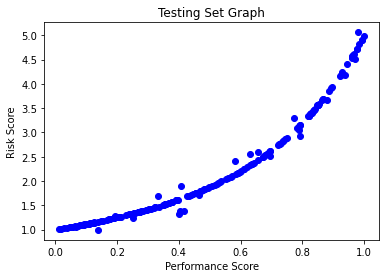

In [10]:
# Extract x and y values from testingdata
x = [data[0] for data in testingdata]
y = [data[1] for data in testingdata]

# Create scatter plot
plt.scatter(x, y, color='blue')
plt.xlabel('Performance Score')
plt.ylabel('Risk Score')
plt.title('Testing Set Graph')
plt.show()

`(Task 2.3.1) Re-Sampling data`

Dividing the train set into 20 equal parts randomly, so that we get 20 different train datasets to train our model

In [11]:
numberOfTrainingParts=20
numberOfDegrees=15

numberOfPointsInEachTrainingPart=len(trainingdata)/numberOfTrainingParts
# print(numberOfPointsInEachTrainingPart)

np.random.shuffle(trainingdata)
training_sets = np.array_split(trainingdata, numberOfTrainingParts)

    Degree  Average Bias  Average Variance  Mean Squared Error  \
0        1      0.269322          0.008578            0.123053   
1        2      0.086814          0.000670            0.012763   
2        3      0.033313          0.000348            0.005046   
3        4      0.025727          0.000379            0.004659   
4        5      0.024765          0.000511            0.004733   
5        6      0.025162          0.000950            0.005187   
6        7      0.024564          0.000892            0.005143   
7        8      0.025346          0.001951            0.006257   
8        9      0.027186          0.003666            0.008077   
9       10      0.028450          0.005180            0.009616   
10      11      0.060141          0.196997            0.211351   
11      12      0.146380          2.197083            2.323908   
12      13      0.222026          6.035006            6.366367   
13      14      0.072738          0.359475            0.384647   
14      15

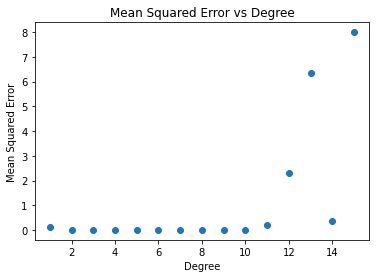

The degree with the lowest mean squared error is 4.0


In [12]:
average_bias = []
average_variance = []
average_squarebias = []
mean_squared_error = []
irreducible_error = []

# Loop over all degrees of polynomial
for i in range(1, numberOfDegrees + 1):
    store_everything = [[0 for j in range(200)] for i in range(20)]
    mean_everything =  []
    degree_models = []

    # Initialize empty lists to store bias and variance for each model
    bias = []
    variance = []
    squared_bias = []
    for j in range(numberOfTrainingParts):

        training_X = training_sets[j][:, 0].reshape(-1, 1)
        training_Y = training_sets[j][:, 1]
        polynomial_features = PolynomialFeatures(i)
        polynomial_X = polynomial_features.fit_transform(training_X)
        model = LinearRegression().fit(polynomial_X, training_Y)
        degree_models.append(model)
        testing_X = testingdata[:, 0].reshape(-1, 1)
        testing_X_poly = polynomial_features.fit_transform(testing_X)
        predictions = model.predict(testing_X_poly)
        store_everything[j] += predictions 


    testing_Y = testingdata[:, 1]
    # now first to calulate bias 
    for j in range(200):
        sum = 0
        for k in range(20):
            sum += store_everything[k][j]
        sum/=20
        mean_everything.append(sum)
    cur_bias = []
    for j in range(200):
        cur_bias.append(np.abs(mean_everything[j]-testing_Y[j]))
    average_bias.append(np.mean(cur_bias))

    # now to calculate average variance 
    cur_var = []
    for j in range(200):
        temp_var = []
        for k in range(20):
            temp_var.append(store_everything[k][j])
        cur_var.append(np.var(temp_var))
    average_variance.append(np.mean(cur_var))

    # now to calculate the squared bias 
    cur_sqbias = []
    for j in range(200):
        cur_sqbias.append(np.square(cur_bias[j]))
    average_squarebias.append(np.mean(cur_sqbias))

    # now onto mse 
    cur_mse = []
    for j in range(200):
        sum = 0
        for k in range(20):
            sum += np.square(store_everything[k][j]-testing_Y[j])
        sum/=20
        cur_mse.append(sum)
    mean_squared_error.append(np.mean(cur_mse))


    cur_irr = []
    for j in range(200):
        cur_irr.append(cur_mse[j]- cur_sqbias[j] - cur_var[j])
    irreducible_error.append(np.mean(cur_irr))
    


mytable = pd.DataFrame({
    'Degree': list(range(1, 16)),
    'Average Bias': average_bias,
    'Average Variance': average_variance,
    'Mean Squared Error': mean_squared_error,
    'Irreducible Error': irreducible_error
})
print(mytable)


degrees = mytable['Degree']

mse = mytable['Mean Squared Error']

plt.scatter(degrees, mse)

plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Degree')
plt.show()

min_row = mytable.loc[mytable['Mean Squared Error'].idxmin()]

best_degree = min_row['Degree']

print(f"The degree with the lowest mean squared error is {best_degree}")